In [ ]:
import sys
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt

#read the csv file
df = pd.read_csv("full_context_PeerRead.csv")
df.head(10)

,right_citated_text,left_citated_text,source_abstract,source_author,source_id,source_title,source_venue,source_year,target_id,target_author,target_abstract,target_year,target_title,target_venue
0,andsyntactic parsing .Because RNNs make very f...,We conducted additional experiments on artific...,Deep Neural Networks (DNNs) are powerful model...,ilya sutskever;oriol vinyals;quoc v le,1409.3215v1,Sequence to Sequence Learning with Neural Netw...,NIPS,2014.0,1606.03622v1,robin jia;percy liang,Modeling crisp logical regularities is crucial...,2016,Data Recombination for Neural Semantic Parsing,ACL
1,.Because RNNs make very few domain-specific as...,We conducted additional experiments on artific...,Syntactic parsing is a fundamental problem in ...,oriol vinyals;lukasz kaiser;terry koo;slav pet...,1412.7449v1,Grammar as a Foreign Language,NIPS,2014.0,1606.03622v1,robin jia;percy liang,Modeling crisp logical regularities is crucial...,2016,Data Recombination for Neural Semantic Parsing,ACL
2,"; in a Pointer Network,the only way to generat...","Reproducibility. All code, data, and experimen...",We introduce a new neural architecture to lear...,oriol vinyals;meire fortunato;navdeep jaitly,1506.03134v1,Pointer Networks,NIPS,2015.0,1606.03622v1,robin jia;percy liang,Modeling crisp logical regularities is crucial...,2016,Data Recombination for Neural Semantic Parsing,ACL
3,". Recently, nsur . have shown superior perfor...","st like CWS and POS tagging, automatic prosody...",The recently introduced continuous Skip-gram m...,tomas mikolov;ilya sutskever;kai chen 0010;gre...,1310.4546v1,Distributed Representations of Words and Phras...,NIPS,2013.0,1511.00360v1,chuang ding;lei xie;jie yan;weini zhang;yang liu,Prosody affects the naturalness and intelligib...,2015,Automatic Prosody Prediction for Chinese Speec...,arxiv
4,model trained on the Google News dataset3.In a...,We begin by considering a document as the set ...,The recently introduced continuous Skip-gram m...,tomas mikolov;ilya sutskever;kai chen 0010;gre...,1310.4546v1,Distributed Representations of Words and Phras...,NIPS,2013.0,1705.10900v1,paul michel;abhilasha ravichander;shruti rijhwani,We investigate the pertinence of methods from ...,2017,Does the Geometry of Word Embeddings Help Docu...,arxiv
5,". We observe that by themselves, Ph embeddings...","With GMM and Aw2v+Ph, the F1-Score of clusteri...",We report on a series of experiments with conv...,yoon kim,1408.5882v1,Convolutional Neural Networks for Sentence Cla...,EMNLP,2014.0,1705.10900v1,paul michel;abhilasha ravichander;shruti rijhwani,We investigate the pertinence of methods from ...,2017,Does the Geometry of Word Embeddings Help Docu...,arxiv
6,. We observe that Ph embeddings perform poorly...,We evaluate our method on the CSP dataset8. Th...,Many machine learning algorithms require the i...,quoc v le;tomas mikolov,1405.4053v1,Distributed Representations of Sentences and D...,ICML,2014.0,1705.10900v1,paul michel;abhilasha ravichander;shruti rijhwani,We investigate the pertinence of methods from ...,2017,Does the Geometry of Word Embeddings Help Docu...,arxiv
7,or purely word vector based methods . .cument...,We perform document-level binary sentiment cla...,Many machine learning algorithms require the i...,quoc v le;tomas mikolov,1405.4053v1,Distributed Representations of Sentences and D...,ICML,2014.0,1705.10900v1,paul michel;abhilasha ravichander;shruti rijhwani,We investigate the pertinence of methods from ...,2017,Does the Geometry of Word Embeddings Help Docu...,arxiv
8,. Two most popular approaches of DGM rely on v...,In the lack of sufficient health status inform...,The ever-increasing size of modern data sets c...,diederik p kingma;shakir mohamed;danilo jimene...,1406.5298v1,Semi-supervised Learning with Deep Generative ...,NIPS,2014.0,1709.00845v1,andre s yoon;taehoon lee;yongsub lim;deokwoo j...,This work presents a novel semi-supervised lea...,2017,Semi-supervised Learning with Deep Generative ...,arxiv
9,. Th

In [ ]:
#get a list of tuples with edges
result_list = df.apply(lambda row: (row['source_title'], row['target_title']), axis=1).tolist()
#create a directional graph
G = nx.DiGraph()
edges = result_list
G.add_edges_from(edges)

# Run PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85)  # alpha is the damping parameter (usually set to 0.85)


In [ ]:
df.shape

(16669, 14)

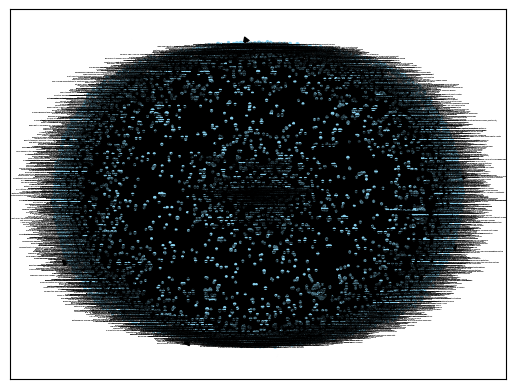

In [ ]:
# general layout
pos = nx.spring_layout(G)
node_size = [pagerank_scores[node] * 10000 for node in G.nodes]

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=0, font_color='black', font_weight='bold')

# Display the plot
plt.show()

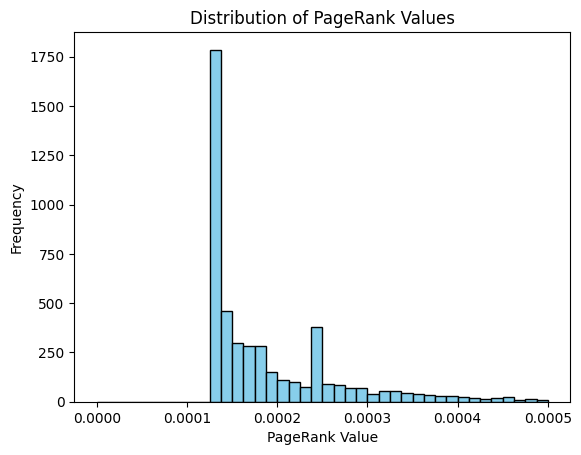

In [ ]:
#distribution of page rank
plt.hist(pagerank_scores.values(), bins=40, range=(0, 0.0005), color='skyblue', edgecolor='black')
plt.title('Distribution of PageRank Values')
plt.xlabel('PageRank Value')
plt.ylabel('Frequency')
plt.show()

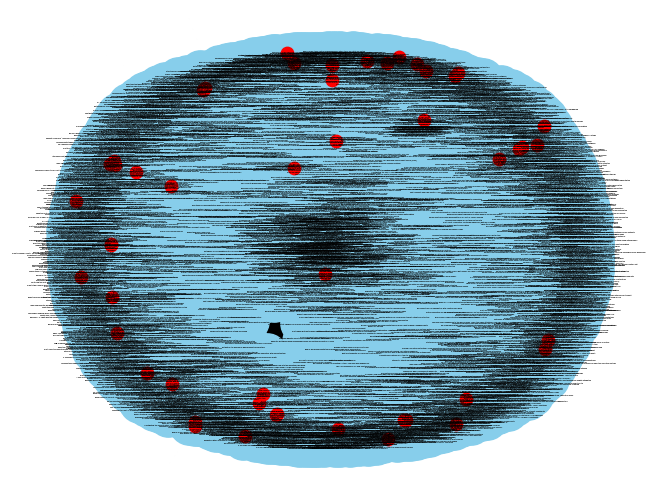

In [ ]:
#layout highlighting the top page rank graphs
top_nodes = sorted(pagerank_scores, key=lambda x: pagerank_scores[x], reverse=True)[:50]

# Subgraph containing only the top nodes
top_subgraph = G.subgraph(top_nodes)
# Plot the subgraph
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, arrows=True, node_size=800, node_color='skyblue', font_size=1, font_color='black', font_weight='bold')
nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_size=80, node_color='red')  # Highlight top nodes in red
plt.show()

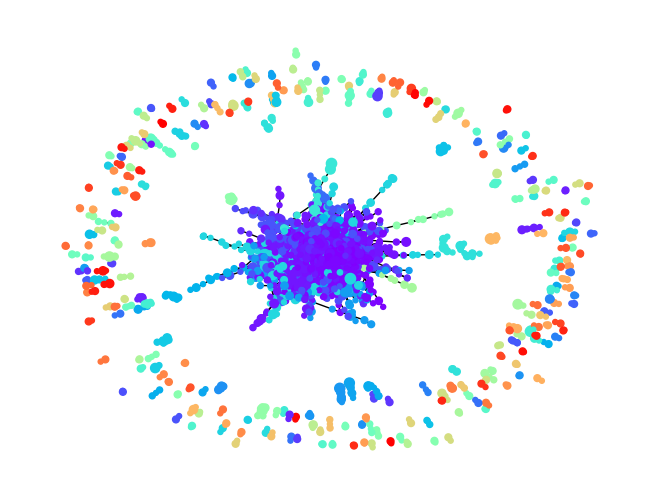

In [ ]:
# using best_partition from community_louvain to cluster these nodes into groups
from community import community_louvain
G_undirected = G.to_undirected()

# Perform community detection with a specific resolution
resolution = 1.0
partition = community_louvain.best_partition(G_undirected, resolution=resolution)

# Assign a color to each community
colors = [partition[node] for node in G_undirected.nodes]
node_size = [pagerank_scores[node] * 100000 for node in G.nodes]


# Plot the graph with communities colored
pos = nx.spring_layout(G_undirected)
nx.draw(G_undirected, pos, with_labels=False, node_color=colors, cmap=plt.cm.rainbow, node_size= node_size)
plt.show()


In [ ]:
# Node Degree
node_degrees = dict(G.degree())

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)

average_degree = sum(node_degrees.values()) / len(node_degrees)
average_clustering = nx.average_clustering(G)
#diameter = nx.diameter(G)
density = nx.density(G)

print("Node Degrees:", node_degrees)
print("Clustering Coefficient:", clustering_coefficient)
print("Average Degree:", average_degree)
print("Average Clustering Coefficient:", average_clustering)
print("Density:", density)

Node Degrees: {'Sequence to Sequence Learning with Neural Networks': 332, 'Data Recombination for Neural Semantic Parsing': 11, 'Grammar as a Foreign Language': 72, 'Pointer Networks': 44, 'Distributed Representations of Words and Phrases and their Compositionality': 412, 'Automatic Prosody Prediction for Chinese Speech Synthesis using BLSTM-RNN and Embedding Features': 1, 'Does the Geometry of Word Embeddings Help Document Classification? A Case Study on Persistent Homology Based Representations': 3, 'Convolutional Neural Networks for Sentence Classification': 112, 'Distributed Representations of Sentences and Documents': 102, 'Semi-supervised Learning with Deep Generative Models': 33, 'Semi-supervised Learning with Deep Generative Models for Asset Failure Prediction': 4, 'Multi-Sensor Prognostics using an Unsupervised Health Index based on LSTM Encoder-Decoder': 4, 'Ladder Variational Autoencoders': 4, 'Adam: A Method for Stochastic Optimization': 536, 'Do Deep Nets Really Need to be